# <center>DS4E, Summer 2021: Homework 4<center>

This homework is due on **Monday**, **June 28**, by **9am EDT**. The homework is worth **35 points**, or 10% of the course grade. You can earn one point per sub-question. The course academic integrity policy applies to every homework, including this one.

## Instructions

This homework contains **multiple choice**, **short answer** and **programming** questions. 

Multiple choice questions:

* Select your answer from the dropdown menu.

Short answer questions:

* Write your answer. Be brief and concise. You are not required to use full sentences.

Programming questions:
* If you see a `...` in the cell below the question, simply replace the `...` with your code.
* If the cell is blank, write the full code yourself.

Notes:
* Save your work as you go.
* If you create additional code cells for scratch work, please **remove them before submission**. Your submission should not include any additional code cells. This enables us to grade your submission in a timely manner.

## Submission

To submit this homework:
1. Download a copy as an .ipynb file by going to "File > Download > Download .ipynb"
2. You must then upload the .ipynb file as your submission for Homework 4 under the Assignments tab on Brightspace.    
3. **Please include your name in the filename of your .ipynb notebook, e.g. "hw4_George_Wood.ipynb"**

# <u>Question 1: Importing and tidying data</u>

In this homework, you will analyze data on a large number of US Colleges from the 1995 issue of [US News and World Report](https://en.wikipedia.org/wiki/U.S._News_%26_World_Report). You should review the description of the variables in our course Github [repository](https://github.com/george-wood/DS4E).

**(a) The dataset `college.csv` is available in our course Github repository. In the code cell below, import pandas as pd and use the `read_csv()` function to read the college data as a DataFrame and assign it to an object called `data`. Then print the first 5 rows of `data`.**

In [6]:
import pandas as pd 
file_path = 'https://raw.githubusercontent.com/george-wood/DS4E/main/data/college.csv'
data = pd.read_csv(file_path)
data.head()

,college,Private,Apps,accept,enroll,Tuition,Grad.Rate,expenditure,Perc.AlumniDonation
0,Abilene Christian University,Yes,1660,1232,721,7440,60,7041,12
1,Adelphi University,Yes,2186,1924,512,12280,56,10527,16
2,Adrian College,Yes,1428,1097,336,11250,54,8735,30
3,Agnes Scott College,Yes,417,349,137,12960,59,19016,37
4,Alaska Pacific University,Yes,193,146,55,7560,15,10922,2


**(b) As always when working with a dataset, we first want to clean things up. Rename the following columns exactly as follows and print the first 5 rows again.**

* "Private" as "private"
* "Apps" as "applications"
* "Tuition" as "tuition"
* "Grad.Rate" as "graduation"
* "Perc.AlumniDonation" as "alumni_donation"

In [7]:
data.rename(columns = {'Private':'private','Apps':'applications','Tuition':'tuition','Grad.Rate':'graduation','Perc.AlumniDonation':'alumni_donation'}, inplace = True)
data.head()


,college,private,applications,accept,enroll,tuition,graduation,expenditure,alumni_donation
0,Abilene Christian University,Yes,1660,1232,721,7440,60,7041,12
1,Adelphi University,Yes,2186,1924,512,12280,56,10527,16
2,Adrian College,Yes,1428,1097,336,11250,54,8735,30
3,Agnes Scott College,Yes,417,349,137,12960,59,19016,37
4,Alaska Pacific University,Yes,193,146,55,7560,15,10922,2


**(c) Print the number of rows and columns in `data` below. You may print these in any format as long as both numbers are printed.**

In [ ]:
data.shape

(777, 9)

**(d) Print the data type of each column in `data` by calling the `dtypes` [property](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) of data.**

In [ ]:
print(data.dtypes)

college            object
private            object
applications        int64
accept              int64
enroll              int64
tuition             int64
graduation          int64
expenditure         int64
alumni_donation     int64
dtype: object


# <u>Question 2: Setting up for OLS</u>

We are interested in the relationship between tuition costs and expenditure per student. Before we estimate our OLS model, we should look at the data and formalize our hypotheses and model. 

**(a) One relationship of interest is between tuition costs and expenditure per student. Generate a scatterplot for `expenditure` and `tuition`. You should plot `tuition` on the y-axis and make sure you label axes.**

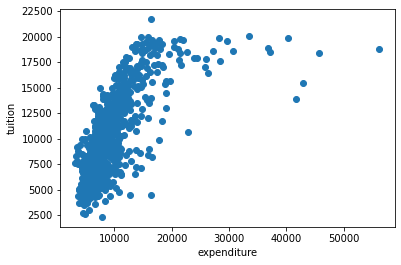

In [8]:
import matplotlib.pyplot as plt
x = data['expenditure'].values
y = data['tuition'].values
plt.scatter(x,y)
plt.xlabel('expenditure')
plt.ylabel('tuition')
plt.show()

**(b) Find the Pearson correlation coefficient for the correlation between tuition and expenditure. Your code should find the correlation coefficient for expenditure and tuition only, not all correlation coefficients in the data.**

*Hint: Search for a function that calculates the Pearson correlation coefficient*

In [17]:
from scipy import stats
coefficient = stats.pearsonr(data['expenditure'],data['tuition'])[0]
print(coefficient)

0.6727786189608973


**(c) We are going to conduct a linear regression using OLS to evaluate the association between our dependent variable, `tuition`, and our independent variable, `expenditure`. Our alternative hypothesis (H1) is that expenditure is associated with tuition. Given this H1, what is our null hypothesis (H0)?**

<ol type="A">
<li>Expenditure and tuition have a correlation coefficient that is less than 0.05</li>
<li>Expenditure is negatively associated with tuition</li>
<li>Expenditure is positively associated with tuition</li>
<li>Expenditure and tuition are not associated</li>
</ol>



In [ ]:
q2c_answer = "D" #@param ["A", "B", "C", "D"]

**(d) Before we conduct our regression analysis, we should formalize our model. Which of the following is the equation for the regression described in question 2C?**

*Note: the $\cdot$ symbol denotes multiplication*

<ol type="A">
<li>$tuition = \alpha + \beta + expenditure$ </li>
<li>$tuition = \alpha + \beta \cdot expenditure$ </li>
<li>$expenditure = \alpha + \beta + tuition$ </li>
<li>$expenditure = \alpha + \beta \cdot tuition$ </li>
</ol>

In [ ]:
q2d_answer = "B" #@param ["A", "B", "C", "D"]

# <u>Question 3: Simple linear regression with OLS</u>

We are now ready to estimate our first OLS model, in which we will investigate the relationship between our dependent variable, tuition costs, and our independent variaable, expenditure per student, in the college data. 

**(a) Let's estimate our regression and show the summary output. In three lines of code, you should: (i) import the relevant module from `statsmodels` for estimating OLS regression; (ii) fit the regression model and assign it to an object called `simple`; (iii) print the summary output of `simple`.**

*Hint: Review the 16.3 lecture code or exercise 5.1 OLS.*

In [20]:
import statsmodels.formula.api as smf
simple = smf.ols('tuition ~ expenditure ', data = data).fit()
simple.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tuition   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     640.9
Date:                Mon, 28 Jun 2021   Prob (F-statistic):          1.63e-103
Time:                        07:54:00   Log-Likelihood:                -7316.8
No. Observations:                 777   AIC:                         1.464e+04
Df Residuals:                     775   BIC:                         1.465e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5433.5123    224.806     24.170      0.000    4992.211    5874.813
expenditure     0.5183      0.020     25.315      0.000       0.478       0.559
==============================================================================
Omnibus:                       39.929   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.984
Skew:                          -0.380   Prob(JB):                     1.73e-15
Kurtosis:                       4.234   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(b) What is the correct interpretation of the coefficient for expenditure?**

<ol type="A">
<li>A one-unit increase in tuition is associated with a 0.52 increase in expenditure</li>
<li>A 0.52-unit increase in tuition is associated with a one-unit increase in expenditure</li>
<li>A one-unit increase in expenditure is associated with a 0.52 increase in tuition</li>
<li>A 0.52-unit increase in expenditure is associated with a one-unit increase in tuition</li>
</ol>

In [ ]:
q3b_answer = "C" #@param ["A", "B", "C", "D"]

**(c) What is the correct interpretation of the coefficient for the intercept?**

<ol type="A">
<li>The residual for the model</li>
<li>The value for expenditure when the null hypothesis is true</li>
<li>The value for expenditure when ladder is 0</li>
<li>The value for tuition when expenditure is 0</li>
</ol>

In [ ]:
q3c_answer = "D" #@param ["A", "B", "C", "D"]

**(d) Suppose we set a significance level of 0.05, which is very common in the social sciences. According to the p-value for the coefficient for expenditure, is the expenditure coefficient statistically significant?**

<ol type="A">
<li>Yes, the coefficient is statistically significant</li>
<li>No, the coefficient is not statistically significant</li>
<li>The p-value and statistical signficance are unrelated</li>
</ol>

In [ ]:
q3d_answer = "A" #@param ["A", "B", "C", "D"]

**(e) What does this mean for our null and alternative hypothesis?**

<ol type="A">
<li>We reject the alternative hypothesis and accept the null</li>
<li>We reject the alternative hypothesis and fail to reject the null</li>
<li>We reject the null and reject the alternative hypothesis </li>
<li>We reject the null hypothesis</li>
</ol>

In [ ]:
q3e_answer = "D" #@param ["A", "B", "C", "D"] 

**(f) Consider the R-squared in the output. What does this tell us about our model?**

<ol type="A">
<li>That our model minimizes the sum of squared residuals</li>
<li>The probability that we are violating our assumption of a linear relationship between the dependent and independent variables</li>
<li>The statistical significance of our model in general</li>
<li>The percentage of the variance in our dependent variable that is predictable by our model</li>
</ol>

In [ ]:
q3f_answer = "D" #@param ["A", "B", "C", "D"]

**(g) What does the confidence interval for the coefficient for expenditure tell us?**

<ol type="A">
<li>If we conducted our study many times, 95% of the time our confidence interval would contain the true coefficient</li>
<li>That there is a 95% chance that the true coefficient falls within this interval</li>
<li>The range of the coefficient plus or minus one standard deviation</li>
<li>If we conducted our study many times, 98.6% of the time our confidence interval would contain the true coefficient</li>
</ol>

In [ ]:
q3g_answer = "A" #@param ["A", "B", "C", "D"]

**(h) Plot the fitted regression line on a scatterplot of expenditure and tuition. First, create the scatterplot with expenditure on the x-axis and tuition on the y-axis, as you did for question 2(a). We have included code to generate an object, `x`, which covers the range of expenditure values in the data. Second, you should calculate an object, `y`, which uses the intercept and coefficient for expenditure, along with `x`, to calculate the fitted y-values. Third, you should plot these `x` and `y` values as a line on your scatterplot.**

*Hint: Refer to the last plot shown in exercise 5.1 OLS.*

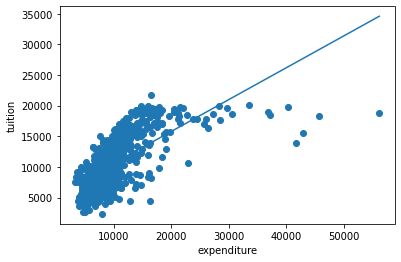

In [21]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(min(data['expenditure']), max(data['expenditure']))
y = simple.params['Intercept'] + simple.params['expenditure'] * x
plt.scatter(data['expenditure'], data['tuition'])
plt.plot(x,y)
plt.xlabel('expenditure')
plt.ylabel('tuition')
plt.show()

**(i) Interpret the fitted regression line and scatterplot you generated in question 3(h). In the text cell below, write down one observation about the plot. You must refer to the fitted regression line in your answer.**

*Note: Your observation may relate to any aspect of the plot, and we will accept any reasonable observation. However, your answer must refer to the fitted regression line.*


as the regression line suggests, this is a positive linear association in the original scatterplot

# <u>Question 4: Multiple linear regression with OLS</u>

Simple linear regression refers to a model where there is only one indepedent variable. In this next series of questions, we will conduct multiple linear regression, which means we have more than one independent variable.

**(a) It is plausible that tuition could be associated with several variables in our data. We suspect that tuition may be associated with whether a school is private or public. Estimate a multiple OLS model where we add "private" as a second independent variable, alongside expenditure. You should assign the fit to an object called `multiple`. Then print the summary output for `multiple`.**

In [ ]:
multiple = smf.ols('tuition ~ expenditure + private ', data = data).fit()
multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tuition   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     596.1
Date:                Sun, 27 Jun 2021   Prob (F-statistic):          2.01e-157
Time:                        13:48:33   Log-Likelihood:                -7188.7
No. Observations:                 777   AIC:                         1.438e+04
Df Residuals:                     774   BIC:                         1.440e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3550.3272    219.370     16.184      0.000    3119.696    3980.958
private[T.Yes]  3663.4885    210.713     17.386      0.000    3249.851    4077.126
expenditure        0.4375      0.018     24.326      0.000       0.402       0.473
==============================================================================
Omnibus:                       46.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.223
Skew:                          -0.341   Prob(JB):                     8.59e-24
Kurtosis:                       4.678   Cond. No.                     3.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**(b) What is the correct interpretation of the coefficient for private?**

<ol type="A">
<li>The joint effect of a college being private and a one-unit increase expenditure is associated with 3,663 higher tuition</li>
<li>Private colleges have lower tuition than public colleges, on average</li>
<li>A college being private is associated with 3,663 higher tuition</li>
<li>A college being private is associated with 3,663 higher tuition, holding expenditure constant </li>
</ol>

In [ ]:
q4b_answer = "D" #@param ["A", "B", "C", "D"]

**(c) Which R-squared should we consult for multiple regression, and why**

<ol type="A">
<li>Adjusted R-squared, because it takes into account risks of nonlinearity</li>
<li>Adjusted R-squared, because it "penalizes" us for adding variables, which would otherwise increase R-squared</li>
<li>R-squared, because we prefer simpler versions of our output wherever possible</li>
<li>R-squared, because it is the correlation coefficient (r) squared</li>
</ol>

In [ ]:
q4c_answer = "B" #@param ["A", "B", "C", "D"]

**(d) What does "Prob (F-statistic)" tell us in this output?**

<ol type="A">
<li>That the the coefficients in our model are jointly statistically significant at the p < 0.01 level</li>
<li>That the the coefficients in our model are jointly not statistically significant at the p < 0.01 level</li>
<li>That the p-values for each coefficient are likely overstating their significance</li>
<li>The probability that the F-statistic is correct in this case</li>
</ol>

In [ ]:
q4d_answer = "A" #@param ["A", "B", "C", "D"]

**(e) The coefficient for private is much larger number than the coefficient for expenditure. In the text cell below, write down one possible explanation for why the coefficient for private is so much larger than the coefficient for expenditure.**

because the value for whether or not to go to private college is only true or false. so it would make a big difference. while the number values for expenditure is more than 2 so it would have a lower coefficient.

In [ ]:
Question 5: An ML approach to simple linear regression</u>

We are going to conduct the simple linear regression from Question 2, but this time using a machine learning approach.

Hint: For this series of questions, you may find it helpful to review the 18.2 lecture code and exercise 5.1 OLS.*

**(a) To build and evaluate our ML model for linear regression, we are going to need to import two modules (LinearRegression and train_test_split) from `sklearn`. Do so below.**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**(b) Create two arrays, one called `x` that contains the values for expenditure, and one called `y` that contains the values for tuition.**

*Hint: You will need to use `.values.reshape`. See 18.2 lecture code.*

In [ ]:
x = data['expenditure'].values.reshape(-1,1)
y = data['tuition'].values.reshape(-1,1)
print(x.shape,y.shape)

(777, 1) (777, 1)


**(c) Split `x` and `y` into training and test sets, where the test sets are 30% of the observations. Set the random state to 1.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**(d) Fit the linear regression to `x_train` and `y_train` using ML.**

In [ ]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**(e) Print the intercept and coefficient from your ML linear regression.**

*Hint: You can compare your results to the output from 4(a). The intercept and coefficient for expenditure should be similar.*

In [ ]:
k = regr.coef_
b = regr.intercept_
print(k,b)

[[0.47429784]] [5843.79858675]


# <u>Question 6: KNN classification </u>

In this question, we will conduct KNN analysis of a categorical version of our dependent variable. You should refer to the 19.2 lecture code and exercise 5.2 KNN.

**(a) We need three more modules from `sklearn` in order to carry out and evaluate our KNN model. Import them by running the code cell below.**

*Note: You do not need to write any code. This is a free point.*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

**(b) Classifiers require a categorical dependent variable. We will generate a categorical tuition variable by transforming tuition into "high" and "low" values. First, generate a histogram of tuition.**

(array([ 17.,  93., 142., 143., 142.,  94.,  49.,  44.,  47.,   6.]),
 array([ 2340.,  4276.,  6212.,  8148., 10084., 12020., 13956., 15892.,
        17828., 19764., 21700.]),
 <a list of 10 Patch objects>)

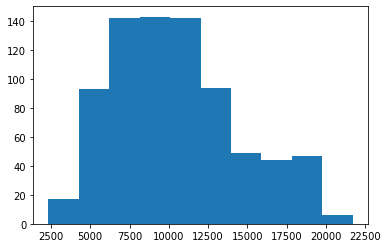

In [ ]:
plt.hist(data['tuition'])

**(c) We will use the median as the threshold to divide our tuition variable into "high" and "low" values. Find the median (i.e. 50%) tuition using the `describe()` function.**

In [ ]:
mid = data['tuition'].describe()['50%']
print(mid)

9990.0


**(d) The median is approximately 10,000. We will use this as our threshold. Below, we create a new column in `data` called `tuition_category` that labels all values above 10,000 as "high" and all values 10,000 or below as "low". Print the number of `low` values and `high` values in the `tuition_category` column.**

*Hint: You can use the `value_counts()` function.*

In [ ]:
data['tuition_category'] = pd.cut(data.tuition, bins=[0, 10000, 100000], labels=['low', 'high'])
data['tuition_category'].value_counts()

low     394
high    383
Name: tuition_category, dtype: int64

**(e) Below, we use the OrdinalEncoder function to transform the "Yes" into 1 and "No" into 0 in the `private` variable. We then create an object `X` that contiains the private and expenditure variables, and an object `y` that contains our dependent variable, tuition_category. In the code cell below, split `X` and `y` into training and test sets, where the test sets are 20% of the observations. Set the random state to 1.**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oenc = OrdinalEncoder()
data[['private']] = oenc.fit_transform(data[['private']]).astype(int)
oenc.inverse_transform([[0],[1]])

X = data[['private', 'expenditure']].values
y = data['tuition_category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



**(f) Here we run some feature scaling on our variables so that the distances are comparable. Run the below code.**

*Note: You do not need to write any code. This is a free point. You will need to make sure you called your splits X_train, X_test, y_train, y_test in your answer to question 6(e).*

In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()                           
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**(g) Write two lines of code to train the KNN classifier. Set k=5. You should assign the classifier to an object called `classifier`.**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='distance', n_jobs=1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=1, weights='distance')

**(h) Run the below code cell, which predicts the tuition categories for the `X_test` data split using the classifier we just trained. The first 5 predictions are printed. We then plot a confusion matrix. Review the below to interpret the confusion matrix:**

<ul>
<li>The number in the top left refers to the number of high tuition colleges correctly predicted as high tuition</li>
<li>The number in the top right refers to the number of high tuition colleges incorrectly predicted as low tuition</li>
<li>The number in the bottom left refers to the number of low tuition colleges incorrectly predicted as high tuition</li>
<li>The number in the bottom right refers to the number of low tuition colleges correctly predicted as low tuition
</ul>

*Note: You do not need to write any code. This is a free point. You will need to ensure that you called your KNN classifier `classifier` in your answer to question 6(g).*

First five predictions: ['low' 'low' 'low' 'high' 'low']


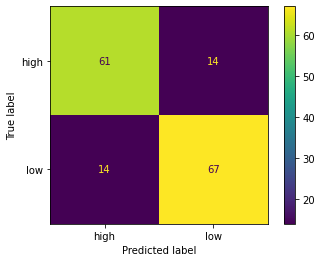

In [ ]:
from sklearn.metrics import plot_confusion_matrix

y_pred = classifier.predict(X_test)
print("First five predictions:", y_pred[0:5])

plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

## End of Homework

Congratulations on finishing your last homework for DS4E! By completing this homework, you have demonstrated that you can import data, clean data, inspect and visualize data, model data using regression and classification, and intepret model outputs. These are key steps in any data science pipeline.

Be sure to submit this file according to the instructions at the top of this notebook.